# Introduction to Python 3

### [AG Supramolekulare und zelluläre Simulationen](https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/) (Prof. Fischer), CCTB, Fakultät für Biologie, Universität Würzburg, 
We are looking forward to your comments and suggestions. Please send them to  sabine.fischer@uni-wuerzburg.de

Supramolecular and cellular simulations: https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/

> ## Simple calculations

In [ ]:
3+5

In [ ]:
2**7

In [ ]:
import math

In [ ]:
math.exp(7)

Documentation for Python standard library: https://docs.python.org/3/index.html

> ## Graph and network analysis

In [1]:
import pandas as pd
import networkx as nx

In [2]:
tube=pd.read_csv("LondonTube.csv")

In [3]:
tube.head()

,Station1,Station2
0,Baker_Street,Paddington
1,Paddington,White_City
2,White_City,Hammersmith
3,Paddington,Notting_Hill_Gate
4,Notting_Hill_Gate,Earls_Court


In [4]:
G = nx.from_pandas_edgelist(tube,
                            source='Station1',
                            target='Station2')

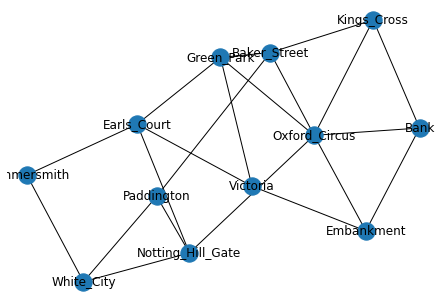

In [8]:
nx.draw(G,with_labels=True)

In [6]:
nx.shortest_path(G, "Bank", "White_City")

['Bank', 'Oxford_Circus', 'Notting_Hill_Gate', 'White_City']

> ## Statistics

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from scipy import stats

In [10]:
mieten = pd.read_csv('Mietpreise_B_A.csv') 

In [11]:
mieten.head()

,Berlin,Amsterdam
0,11.753275,19.600880
1,15.433131,25.581978
2,12.068419,27.021103
3,11.183842,22.183048
4,12.550960,21.897166


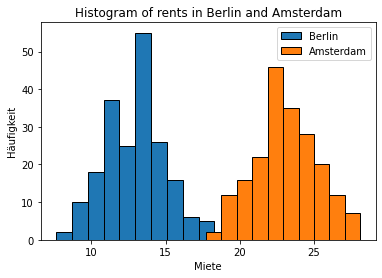

In [12]:
fig,ax = plt.subplots()
ax.hist(mieten["Berlin"],edgecolor='black')
ax.hist(mieten["Amsterdam"],edgecolor='black')
ax.set_xlabel("Miete")
ax.set_ylabel("Häufigkeit")
ax.set_title("Histogram of rents in Berlin and Amsterdam")
ax.legend(("Berlin","Amsterdam"))
plt.show()

graphical display of data: https://python-graph-gallery.com/

In [13]:
[st.stdev(mieten[city])**2 for city in ["Berlin","Amsterdam"]]

[3.9798435385243653, 4.490601367641544]

variances are comparable, same sample size, data close to normal distribution -> hence ttest

null hypothesis: the rent is the same in both cities
<br>level of significance: 0.05

In [14]:
tstatistic,pvalue = stats.ttest_ind(mieten["Berlin"],mieten["Amsterdam"])
print("p-Wert für Vergleich Berlin, Amsterdam:",pvalue)

p-Wert für Vergleich Berlin, Amsterdam: 7.837034983619982e-173


The null hypothesis is rejected. The data indicate that there is a significant difference between rent in Berlin and Amsterdam.

> ## Mathematical modelling

Giant pufferfish
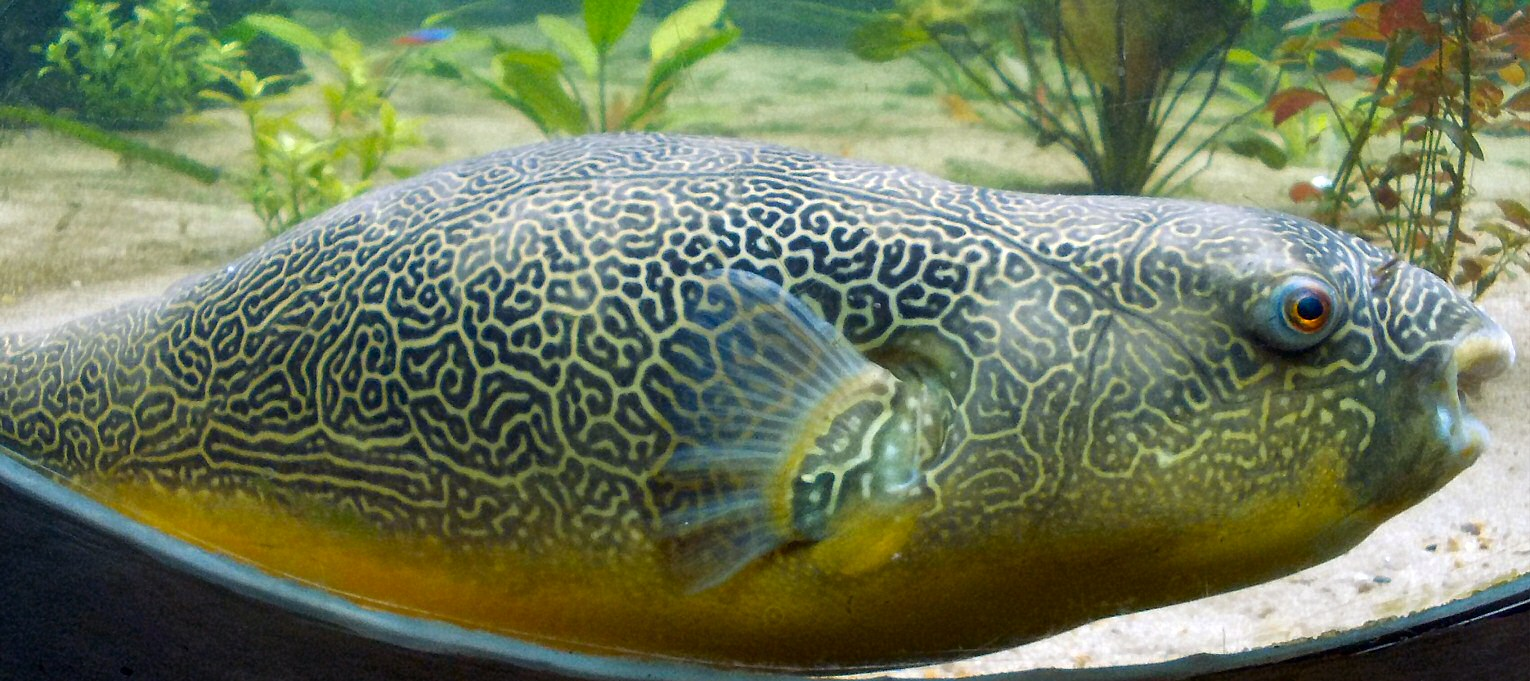
By Chiswick Chap - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=19429370

Turing model: <br>
System of equations with diffusion and reaction terms for $a$ and $b$:
<br> 
\begin{align}
\frac{\partial a(x,t)}{\partial t}&=D_a \frac{\partial^2 a(x,t)}{\partial x^2}+R_a(a(x,t),b(x,t))\\
\frac{\partial b(x,t)}{\partial t}&=D_b \frac{\partial^2 b(x,t)}{\partial x^2}+R_b(a(x,t),b(x,t))
\end{align}
with
\begin{align}
R_a(a,b) &= a-a^3-b+\alpha\\
R_b(a,b)&=\beta (a-b),
\end{align}
with $D_a,D_b,\alpha$ and $\beta$ constant.

adapted from: http://www.degeneratestate.org/posts/2017/May/05/turing-patterns/, accessed on 23/05/2019

### Initialisation

In [1]:
import turingTutorial as tt
from IPython.display import HTML

%matplotlib notebook
%load_ext autoreload
%autoreload 2

### Setting the parameter values

In [2]:
Da = 1
Db = 100
alpha = 0.01
beta = 10

n_steps = 300

### Initialising the system of equations

In [3]:
def Ra(a,b): return a - a ** 3 - b + alpha
def Rb(a,b): return (a - b) * beta

two_d_reactionDiffusion = tt.TwoDimensionalRDEquations(Da, Db, Ra, Rb)

### Solving the system of equations and plotting the last time point (might take some time)

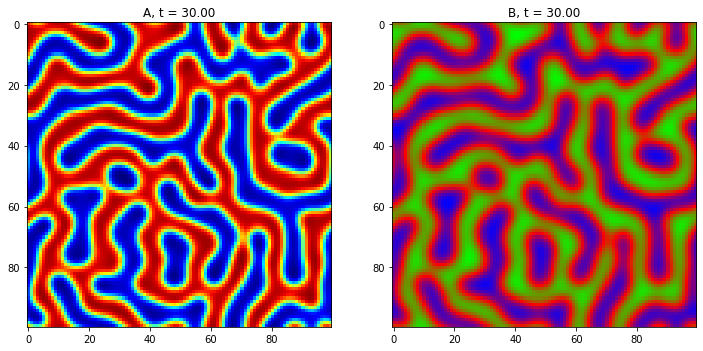

In [5]:
result2D=two_d_reactionDiffusion.plot_evolution_outcome("2DPattern.png",n_steps)

> ## Image analysis

source: http://scipy-lectures.org/advanced/image_processing/

In [6]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

### Geometrical transforms

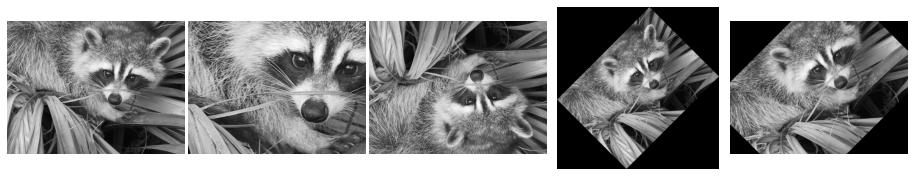

In [7]:
face = scipy.misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx//4:-lx//4, ly//4:-ly//4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

plt.figure(figsize=(12.5, 2.5))


plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Filter

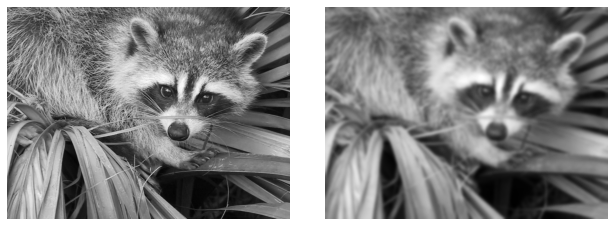

In [8]:
face = scipy.misc.face(gray=True)
blurred = ndimage.gaussian_filter(face, sigma=5)

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(122)
plt.imshow(blurred, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

>  ## Interactive code

source: Tirthajyoti Sarkar:
https://towardsdatascience.com/a-very-simple-demo-of-interactive-controls-on-jupyter-notebook-4429cf46aabd

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

### Variables

In [10]:
N_samples = 25
x=np.linspace(-2,2,N_samples)

### Function definitions (ideal fitting function and actual data generating function with noise)

In [11]:
def f(x,a,mu,sigma):
    r=a*np.exp(-(x-mu)**2/(2*sigma**2))
    return (r)

def func(amplitude,ideal_mu,ideal_sigma,noise_sd,noise_mean):
    r=amplitude*np.exp(-(x-ideal_mu)**2/(2*ideal_sigma**2))
    plt.figure(figsize=(8,5))
    plt.plot(x,r,c='k',lw=3)
    r= r+np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    plt.scatter(x,r,edgecolors='k',c='yellow',s=60)
    plt.grid(True)
    plt.show()
    return (r)

### Call the 'interactive' widget with the data generating function, which also plots the data real-time
** Play with the *'noise_sd'* and *'noise_mean'* parameters to see how they impact the estimation (curve-fit) accuracy **

In [12]:
y=interactive(func,amplitude=[1,2,3,4,5],ideal_mu=(-5,5,0.5),
              ideal_sigma=(0,2,0.2),
              noise_sd=(0,1,0.1),noise_mean=(-1,1,0.2))
display(y)

interactive(children=(Dropdown(description='amplitude', options=(1, 2, 3, 4, 5), value=1), FloatSlider(value=0…

>  ## User interfaces

source: https://www.python-kurs.eu/tkinter_entry_widgets.php

In [13]:
from tkinter import *
from math import *
def evaluate(event):
    res.configure(text = "Ergebnis: " + str(eval(entry.get())))
w = Tk()
Label(w, text="Zu berechnen:").pack()
entry = Entry(w)
entry.bind("<Return>", evaluate)
entry.pack()
res = Label(w)
res.pack()
w.mainloop()

source: https://www.datadependence.com/2016/04/how-to-build-gui-in-python-3/

In [14]:
import tkinter
from tkinter import ttk
 
class Adder(ttk.Frame):
    """The adders gui and functions."""
    def __init__(self, parent, *args, **kwargs):
        ttk.Frame.__init__(self, parent, *args, **kwargs)
        self.root = parent
        self.init_gui()
 
    def on_quit(self):
        """Exits program."""
        quit()
 
    def calculate(self):
        """Calculates the sum of the two inputted numbers."""
        num1 = int(self.num1_entry.get())
        num2 = int(self.num2_entry.get())
        num3 = num1 + num2
        self.answer_label['text'] = num3
 
    def init_gui(self):
        """Builds GUI."""
        self.root.title('Number Adder')
        self.root.option_add('*tearOff', 'FALSE')
 
        self.grid(column=0, row=0, sticky='nsew')
 
        self.menubar = tkinter.Menu(self.root)
 
        self.menu_file = tkinter.Menu(self.menubar)
        self.menu_file.add_command(label='Exit', command=self.on_quit)
 
        self.menu_edit = tkinter.Menu(self.menubar)
 
        self.menubar.add_cascade(menu=self.menu_file, label='File')
        self.menubar.add_cascade(menu=self.menu_edit, label='Edit')
 
        self.root.config(menu=self.menubar)
 
        self.num1_entry = ttk.Entry(self, width=5)
        self.num1_entry.grid(column=1, row = 2)
 
        self.num2_entry = ttk.Entry(self, width=5)
        self.num2_entry.grid(column=3, row=2)
 
        self.calc_button = ttk.Button(self, text='Calculate',
                command=self.calculate)
        self.calc_button.grid(column=0, row=3, columnspan=4)
 
        self.answer_frame = ttk.LabelFrame(self, text='Answer',
                height=100)
        self.answer_frame.grid(column=0, row=4, columnspan=4, sticky='nesw')
 
        self.answer_label = ttk.Label(self.answer_frame, text='')
        self.answer_label.grid(column=0, row=0)
 
        # Labels that remain constant throughout execution.
        ttk.Label(self, text='Number Adder').grid(column=0, row=0,
                columnspan=4)
        ttk.Label(self, text='Number one').grid(column=0, row=2,
                sticky='w')
        ttk.Label(self, text='Number two').grid(column=2, row=2,
                sticky='w')
 
        ttk.Separator(self, orient='horizontal').grid(column=0,
                row=1, columnspan=4, sticky='ew')
 
        for child in self.winfo_children():
            child.grid_configure(padx=5, pady=5)

if __name__ == '__main__':
    root = tkinter.Tk()
    Adder(root)
    root.mainloop()

> ## Rosalind

Platform with examples and excersises for bioinformatics and programming: http://rosalind.info/problems/locations/